# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle
import pandas as pd
# TODO: Fill this in based on where you saved the training and testing data

training_file = 'data/train.p'
validation_file= 'data/valid.p'
testing_file = 'data/test.p'
signnames_file = 'data/signnames.csv'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)

signnames_df = pd.read_csv(signnames_file)
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
import numpy as np

# TODO: Number of training examples
n_train = X_train.shape[0]

# TODO: Number of validation examples
n_validation = X_valid.shape[0]

# TODO: Number of testing examples.
n_test = X_test.shape[0]

# TODO: What's the shape of an traffic sign image?
image_shape = X_train.shape[1:]

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_train))

print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


## DatasetVisualization

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Plot 5 samples for each class

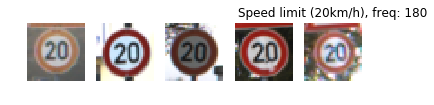

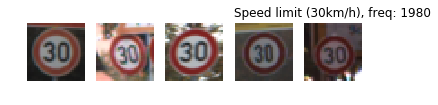

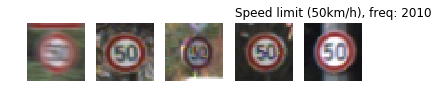

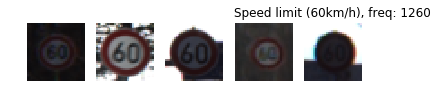

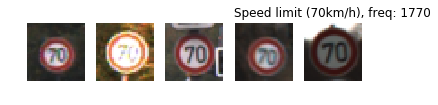

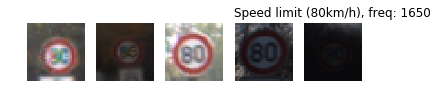

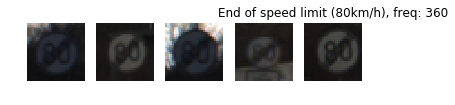

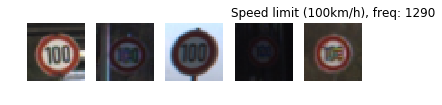

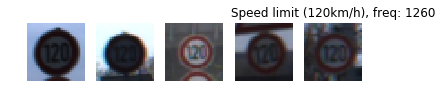

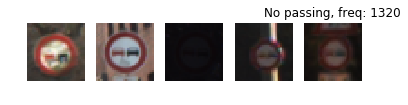

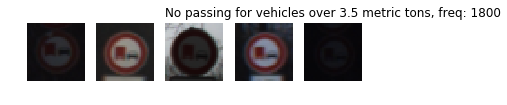

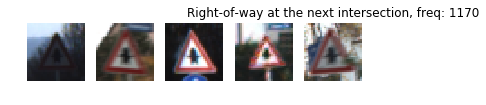

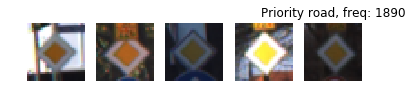

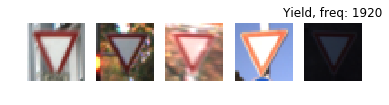

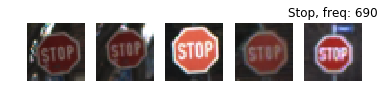

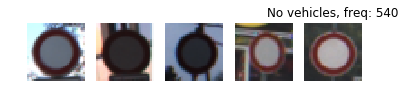

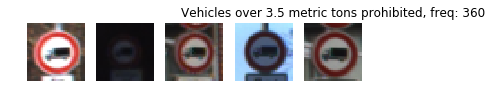

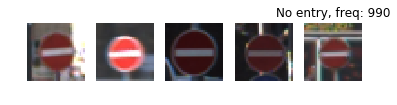

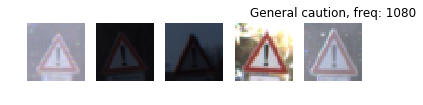

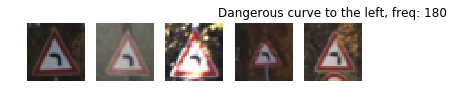

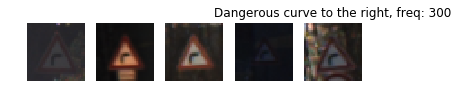

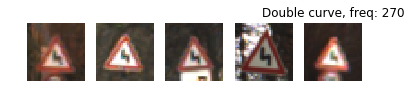

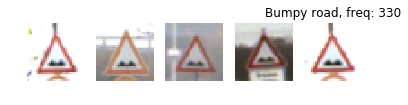

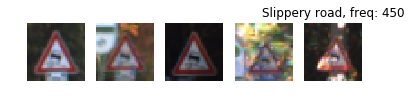

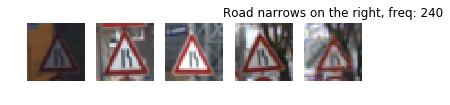

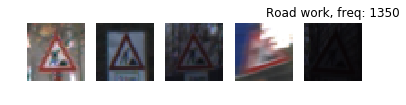

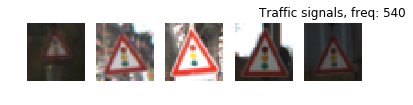

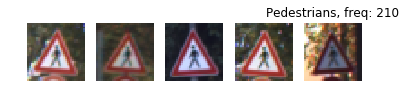

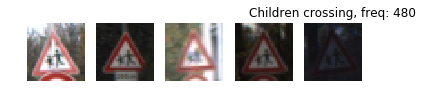

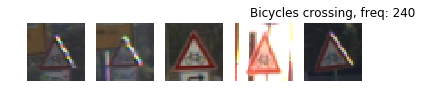

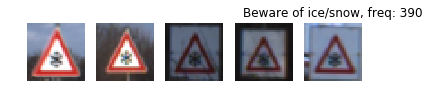

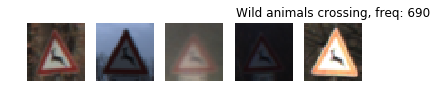

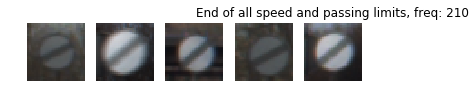

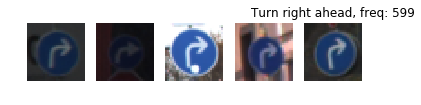

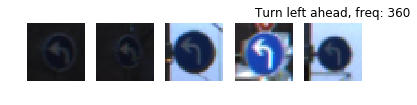

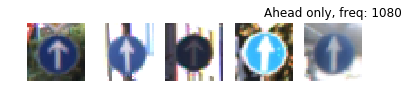

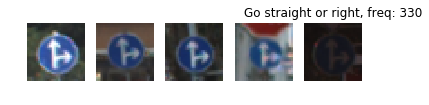

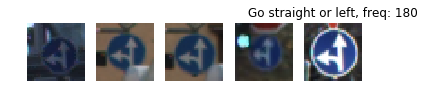

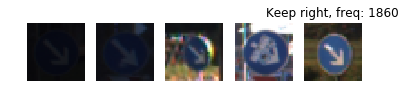

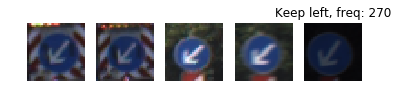

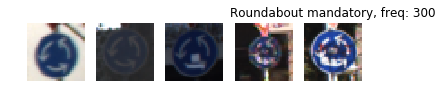

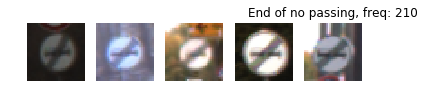

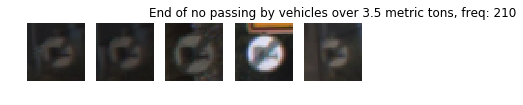

In [5]:
examples_per_class = 5
classes = list(range(n_classes))

freqs = np.bincount(y_train, minlength= n_classes)

for cls in classes:
    idxs = np.where((y_train == cls))[0]
    idxs = np.random.choice(idxs, examples_per_class, replace=False)
    plt.figure(figsize=(6,4))
    for i, idx in enumerate(idxs):
        signname = signnames_df[signnames_df.ClassId == cls].SignName.values[0]
        ax = plt.subplot(1, examples_per_class, i+1)
        ax.axis('off')
        plt.imshow(X_train[idx])
    plt.title("{}, freq: {}".format(signname, freqs[cls]))
    plt.show()
plt.show()

There are a lot of images that are too dark or too bright compared to the rest of the images in their class. These can be considered outliers.

### Find outliers

We define outlier as any image with mean more than 2 standard deviations away from the mean of all images of that class.

In [6]:
def find_outliers(data, m=2):
    mu, std = np.mean(data), np.std(data)
    _filter = (abs(np.mean(data, axis=(1,2,3)) - mu) / std) > m
    return data[_filter]

### Plot outliers in training set

Class: 0, num_images: 180, num_outliers: 0
Class: 1, num_images: 1980, num_outliers: 1


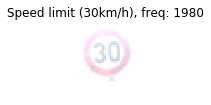

Class: 2, num_images: 2010, num_outliers: 3


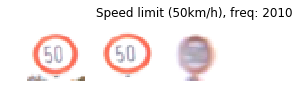

Class: 3, num_images: 1260, num_outliers: 1


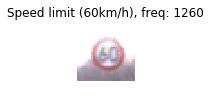

Class: 4, num_images: 1770, num_outliers: 19


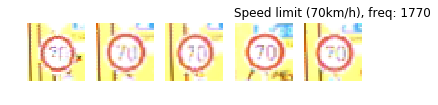

Class: 5, num_images: 1650, num_outliers: 12


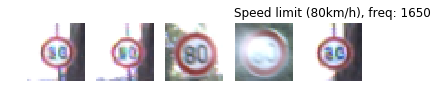

Class: 6, num_images: 360, num_outliers: 0
Class: 7, num_images: 1290, num_outliers: 28


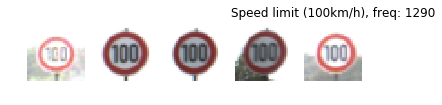

Class: 8, num_images: 1260, num_outliers: 1


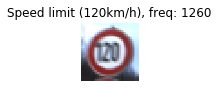

Class: 9, num_images: 1320, num_outliers: 0
Class: 10, num_images: 1800, num_outliers: 69


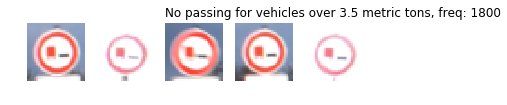

Class: 11, num_images: 1170, num_outliers: 14


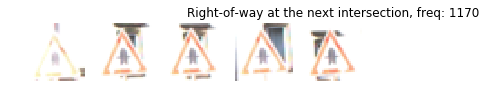

Class: 12, num_images: 1890, num_outliers: 8


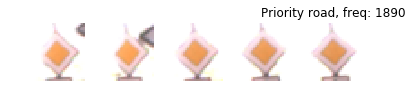

Class: 13, num_images: 1920, num_outliers: 0
Class: 14, num_images: 690, num_outliers: 0
Class: 15, num_images: 540, num_outliers: 0
Class: 16, num_images: 360, num_outliers: 0
Class: 17, num_images: 990, num_outliers: 0
Class: 18, num_images: 1080, num_outliers: 0
Class: 19, num_images: 180, num_outliers: 2


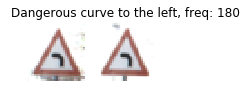

Class: 20, num_images: 300, num_outliers: 3


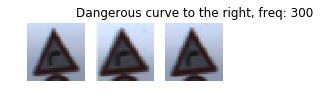

Class: 21, num_images: 270, num_outliers: 0
Class: 22, num_images: 330, num_outliers: 0
Class: 23, num_images: 450, num_outliers: 0
Class: 24, num_images: 240, num_outliers: 0
Class: 25, num_images: 1350, num_outliers: 25


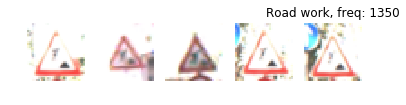

Class: 26, num_images: 540, num_outliers: 0
Class: 27, num_images: 210, num_outliers: 0
Class: 28, num_images: 480, num_outliers: 0
Class: 29, num_images: 240, num_outliers: 0
Class: 30, num_images: 390, num_outliers: 13


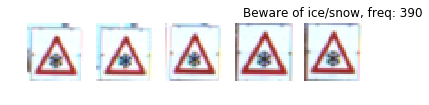

Class: 31, num_images: 690, num_outliers: 2


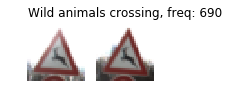

Class: 32, num_images: 210, num_outliers: 0
Class: 33, num_images: 599, num_outliers: 11


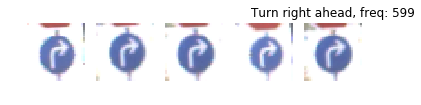

Class: 34, num_images: 360, num_outliers: 0
Class: 35, num_images: 1080, num_outliers: 0
Class: 36, num_images: 330, num_outliers: 0
Class: 37, num_images: 180, num_outliers: 0
Class: 38, num_images: 1860, num_outliers: 4


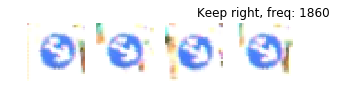

Class: 39, num_images: 270, num_outliers: 0
Class: 40, num_images: 300, num_outliers: 0
Class: 41, num_images: 210, num_outliers: 0
Class: 42, num_images: 210, num_outliers: 2


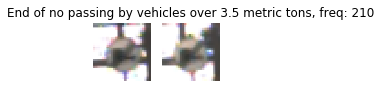

In [7]:
examples_per_class = 5
classes = list(range(n_classes))

freqs = np.bincount(y_train, minlength= n_classes)

for cls in classes:
    idxs = np.where((y_train == cls))[0]
    class_ = X_train[idxs]
    outliers = find_outliers(class_)
    print('Class: {}, num_images: {}, num_outliers: {}'.format(cls, len(class_), outliers.shape[0]))
    if (outliers.shape[0] <= 0):
        continue
    num = min(len(outliers), examples_per_class)
    idxs = np.random.choice(len(outliers), num, replace=False)
    plt.figure(figsize=(6,4))
    for i, idx in enumerate(idxs):
        signname = signnames_df[signnames_df.ClassId == cls].SignName.values[0]
        ax = plt.subplot(1, examples_per_class, i+1)
        ax.axis('off')
        plt.imshow(outliers[idx])
    plt.title("{}, freq: {}".format(signname, freqs[cls]))
    plt.show()
plt.show()

### Plot outliers in validation set

Class: 0, num_images: 30, num_outliers: 0
Class: 1, num_images: 240, num_outliers: 0
Class: 2, num_images: 240, num_outliers: 0
Class: 3, num_images: 150, num_outliers: 0
Class: 4, num_images: 210, num_outliers: 10


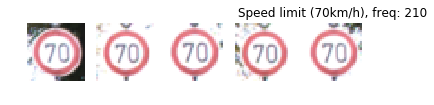

Class: 5, num_images: 210, num_outliers: 0
Class: 6, num_images: 60, num_outliers: 0
Class: 7, num_images: 150, num_outliers: 0
Class: 8, num_images: 150, num_outliers: 4


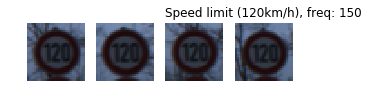

Class: 9, num_images: 150, num_outliers: 0
Class: 10, num_images: 210, num_outliers: 5


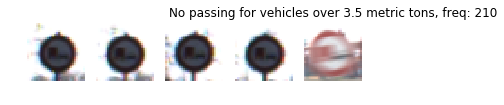

Class: 11, num_images: 150, num_outliers: 0
Class: 12, num_images: 210, num_outliers: 0
Class: 13, num_images: 240, num_outliers: 0
Class: 14, num_images: 90, num_outliers: 0
Class: 15, num_images: 90, num_outliers: 0
Class: 16, num_images: 60, num_outliers: 0
Class: 17, num_images: 120, num_outliers: 0
Class: 18, num_images: 120, num_outliers: 0
Class: 19, num_images: 30, num_outliers: 0
Class: 20, num_images: 60, num_outliers: 0
Class: 21, num_images: 60, num_outliers: 0
Class: 22, num_images: 60, num_outliers: 0
Class: 23, num_images: 60, num_outliers: 0
Class: 24, num_images: 30, num_outliers: 0
Class: 25, num_images: 150, num_outliers: 0
Class: 26, num_images: 60, num_outliers: 0
Class: 27, num_images: 30, num_outliers: 0
Class: 28, num_images: 60, num_outliers: 0
Class: 29, num_images: 30, num_outliers: 0
Class: 30, num_images: 60, num_outliers: 0
Class: 31, num_images: 90, num_outliers: 4


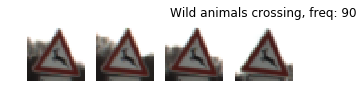

Class: 32, num_images: 30, num_outliers: 0
Class: 33, num_images: 90, num_outliers: 0
Class: 34, num_images: 60, num_outliers: 0
Class: 35, num_images: 120, num_outliers: 0
Class: 36, num_images: 60, num_outliers: 0
Class: 37, num_images: 30, num_outliers: 0
Class: 38, num_images: 210, num_outliers: 0
Class: 39, num_images: 30, num_outliers: 0
Class: 40, num_images: 60, num_outliers: 0
Class: 41, num_images: 30, num_outliers: 0
Class: 42, num_images: 30, num_outliers: 0


In [8]:
examples_per_class = 5
classes = list(range(n_classes))

freqs = np.bincount(y_valid, minlength= n_classes)

for cls in classes:
    idxs = np.where((y_valid == cls))[0]
    class_ = X_valid[idxs]
    outliers = find_outliers(class_)
    print('Class: {}, num_images: {}, num_outliers: {}'.format(cls, len(class_), outliers.shape[0]))
    if (outliers.shape[0] <= 0):
        continue
    num = min(len(outliers), examples_per_class)
    idxs = np.random.choice(len(outliers), num, replace=False)
    plt.figure(figsize=(6,4))
    for i, idx in enumerate(idxs):
        signname = signnames_df[signnames_df.ClassId == cls].SignName.values[0]
        ax = plt.subplot(1, examples_per_class, i+1)
        ax.axis('off')
        plt.imshow(outliers[idx])
    plt.title("{}, freq: {}".format(signname, freqs[cls]))
    plt.show()
plt.show()

### Plot class frequencies in training set

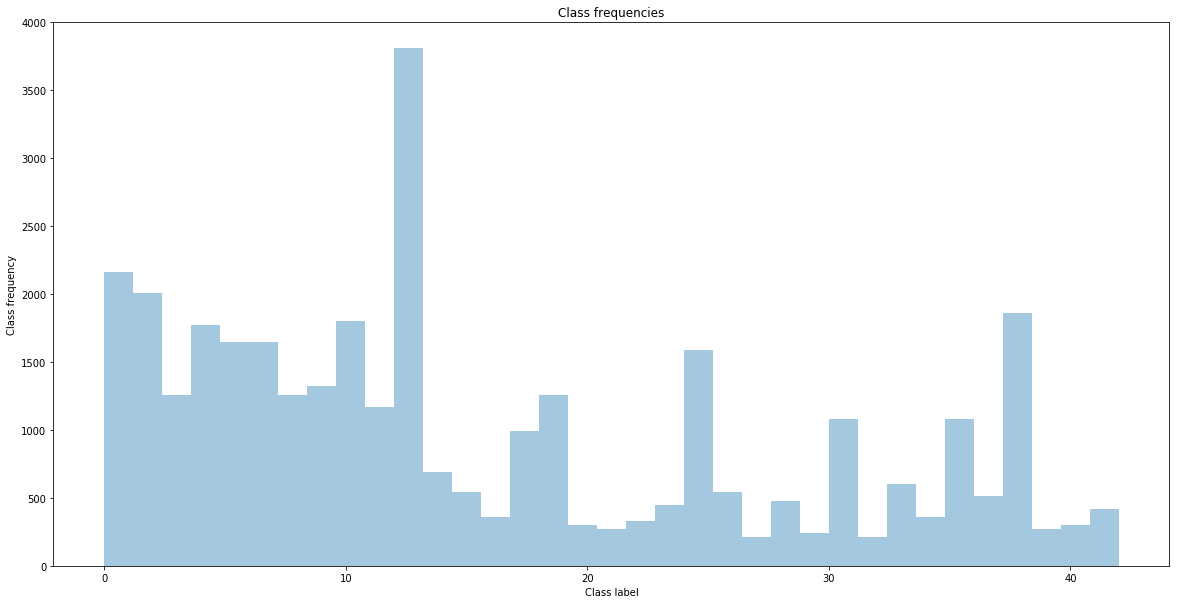

In [9]:
plt.figure(figsize=(20,10))
sns.distplot(y_train, kde=False)
plt.xlabel("Class label")
plt.ylabel("Class frequency")
plt.title("Class frequencies")

### Plot class frequencies in validation set

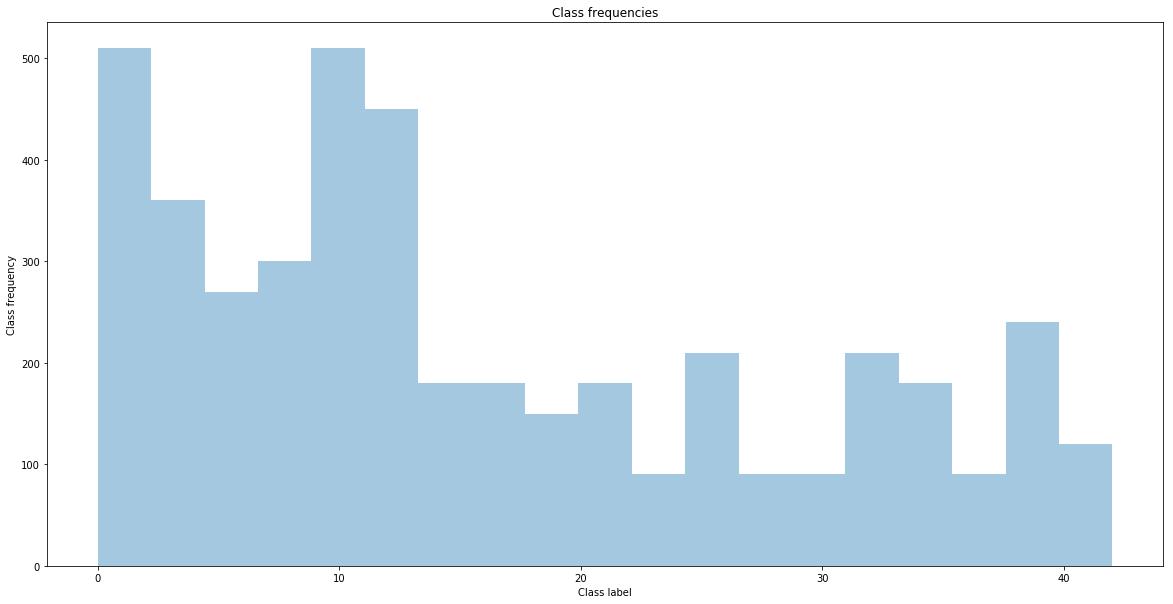

In [10]:
plt.figure(figsize=(20,10))
sns.distplot(y_valid, kde=False)
plt.xlabel("Class label")
plt.ylabel("Class frequency")
plt.title("Class frequencies")

Looks like the classes are heavily imbalanced but atleast the distribution of classes between train and validation set is consistent. Data Augmentation might need to be performed.

### Data Augmentation

In order to keep the frequency of classes consistent between train and validation set I am going to perform data augmentation on all classes. Looking at the above outliers it seems like darkening/whitening might be a good idea. 

In [ ]:
# def data_augment(img):
#     # Adaptive Equalization
#     img_adapteq = exposure.equalize_adapthist(img, clip_limit=0.03)

#     return img_adapteq

# # X_train_augmented = np.ndarray((X_train.shape[0] * 2, X_train.shape[1], X_train.shape[2], X_train.shape[3]), dtype=np.uint8)
# # y_train_augmented = np.ndarray((y_train.shape[0] * 2), dtype=np.uint8)

# # for i in range(X_train.shape[0]):
# #     X_train_augmented[i] = X_train[i]
# #     X_train_augmented[i * 2] = data_augment(X_train[i])
# #     y_train_augmented[i] = y_train[i]
# #     y_train_augmented[i * 2] = y_train[i] 

# i=0
# batch_size = 9
# plt.imshow(X_train[0])
# plt.show()
# for img_batch in datagen.flow(np.expand_dims(X_train[0], axis=0), batch_size=9):
#     for img in img_batch:
#         plt.subplot(330 + 1 + i)
#         plt.imshow(img)
#         i=i+1    
#     if i >= batch_size:
#         break

After trying out various data augmentation techniques like ZCA Whitening, histogram equalization I settled on using simple rotations of 20 degrees as my data augmentation step. This is performed by using Keras ImageDataGenerator further below.

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [11]:
#from skimage.color import rgb2gray

def normalize(x):
    mean = np.mean(x)
    std = np.std(x)
    return (x - mean) / std

def grayscale(x):
    res = np.ndarray((x.shape[0], x.shape[1], x.shape[2], 1), dtype=np.float32)
    for i in range(x.shape[0]):
        res[i] = np.expand_dims(rgb2gray(x[i]), axis=2)
    return res

norm = False
gray = False

X_train_post = X_train
X_valid_post = X_valid
X_test_post = X_test

# if norm:
#     X_train_post = normalize(X_train_post)
#     X_valid_post = normalize(X_valid_post)
#     X_test_post = normalize(X_test_post)

# if gray:
#     X_train_post = grayscale(X_train_post)
#     X_valid_post = grayscale(X_valid_post)
#     X_test_post = grayscale(X_test_post)

y_train_post = y_train
y_valid_post = y_valid
y_test_post = y_test

n_channels = X_train_post.shape[-1]

### Model Architecture

In [12]:
import time
import tensorflow as tf
from tensorflow.contrib.layers import flatten, dropout, l2_regularizer

In [13]:
# Helper methods for convolution and fully connected layers
def conv2d(inputs, filter_size, num_filters, num_channels, strides, layer_name, mu, sigma, reg):
    with tf.name_scope(layer_name):
        with tf.name_scope('weights'):
            filters = tf.get_variable(layer_name + '_W', 
                                      shape = [filter_size, filter_size, num_channels, num_filters],
                                      initializer = tf.contrib.layers.xavier_initializer(uniform=False),
                                      regularizer = tf.contrib.layers.l2_regularizer(reg))
        with tf.name_scope('biases'):
            biases = tf.Variable(tf.constant(0.0, shape=[num_filters], dtype=tf.float32))
        with tf.name_scope('conv'):
            conv = tf.nn.conv2d(inputs, filters, strides, padding='VALID')
        out = tf.nn.bias_add(conv, biases)
        return out

def fc(inputs, num_inputs, num_outputs, layer_name, mu, sigma, reg):
    with tf.name_scope(layer_name):
        with tf.name_scope('weights'):
            weights = tf.get_variable(layer_name + '_W', shape = [num_inputs, num_outputs],
                                      initializer = tf.contrib.layers.xavier_initializer(uniform=False),
                                      regularizer = tf.contrib.layers.l2_regularizer(reg))
        with tf.name_scope('biases'):
            biases = tf.Variable(tf.constant(0.0, shape=[num_outputs], dtype=tf.float32))
        with tf.name_scope('Wx_plus_b'):
            layer = tf.matmul(inputs, weights) + biases
        return layer
    
def model(x):    
    # Hyperparameters
    mu = 0
    sigma = 0.01
    reg = 0.001
    
    # Layer 1: Convolutional. Input = 32x32xn_channels. Output = 28x28x48.
    conv1 = conv2d(x, 5, 48, n_channels, [1, 1, 1, 1], 'conv1', mu, sigma, reg)
    
    # Activation. Input = 28x28x48. Output = 28x28x48
    relu1 = tf.nn.relu(conv1, name='relu1')

    # Pooling. Input = 28x28x48. Output = 14x14x48.
    pool1 = tf.nn.max_pool(relu1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID', name='pool1')
    
    # Dropout. Input = 14x14x48. Output = 14x14x48.
    drop1 = dropout(pool1, keep_prob=0.5)
    
    # Layer 2: Convolutional. Input = 14x14x48. Output = 10x10x24.
    conv2 = conv2d(drop1, 5, 24, 48, [1, 1, 1, 1], 'conv2', mu, sigma, reg)
    
    # Activation.
    relu2 = tf.nn.relu(conv2, name='relu2')

    # Max Pooling. Input = 10x10x24. Output = 5x5x12.
    pool2 = tf.nn.max_pool(relu2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID', name='pool2')

    # Flatten. Input = 5x5x12. Output = 600.
    flat1 = flatten(pool2)

    # Layer 3: Fully Connected. Input = 600. Output = 120.    
    fc1 = fc(flat1, 600, 120, 'fc1', mu, sigma, reg)
    
    # Activation.
    relu3 = tf.nn.relu(fc1, name='relu3')

    # Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2 = fc(relu3, 120, 84, 'fc2', mu, sigma, reg)
    
    # Activation.
    relu4 = tf.nn.relu(fc2, name='relu4')

    # Layer 5: Fully Connected. Input = 84. Output = 43.
    logits = fc(relu4, 84, n_classes, 'fc3', mu, sigma, reg)

    return logits

### Features and Labels

In [14]:
tf.reset_default_graph() 
x = tf.placeholder(tf.float32, (None, 32, 32, n_channels))
y = tf.placeholder(tf.int32, (None))
cross_entropy_weights = tf.placeholder(tf.float32, shape=[None])
one_hot_y = tf.one_hot(y, n_classes)

### Training Pipeline

In [15]:
lrate = 0.001

logits = model(x)
probs = tf.nn.softmax(logits, dim=1)
cross_entropy = tf.losses.softmax_cross_entropy(one_hot_y, logits) + \
                tf.add_n(tf.get_collection(tf.GraphKeys.REGULARIZATION_LOSSES))
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = lrate)
training_operation = optimizer.minimize(loss_operation)
y_pred = tf.argmax(tf.nn.softmax(logits), 1)

### Model Evaluation

In [16]:
labels = tf.argmax(one_hot_y, 1)
predictions = tf.argmax(logits, 1)
correct_prediction = tf.equal(predictions, labels)
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
precision, precision_operation = tf.metrics.precision(labels, predictions)
recall, recall_operation = tf.metrics.recall(labels, predictions)
top_5_operation = tf.nn.top_k(probs, k=5)
saver = tf.train.Saver()

def evaluate(X_data, y_data, sess):
    num_examples = len(X_data)
    total_accuracy = 0
    total_loss = 0.0
    total_precision = 0.0
    total_recall = 0.0
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        loss, accuracy, precision, recall = sess.run([loss_operation, 
                                                      accuracy_operation, 
                                                      precision_operation,
                                                      recall_operation], 
                                                 feed_dict={x: batch_x, y: batch_y})
        total_loss += (loss * len(batch_x))
        total_accuracy += (accuracy * len(batch_x))
        total_precision += (precision * len(batch_x))
        total_recall += (recall * len(batch_x))
    return total_accuracy / num_examples, total_loss / num_examples, total_precision / num_examples, total_recall / num_examples

### Data Augmentation

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(rotation_range=20, 
                             featurewise_center=True, 
                             featurewise_std_normalization=True,
                             data_format='channels_last')
datagen.fit(X_train_post)

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [20]:
from sklearn.utils import shuffle

EPOCHS = 100
BATCH_SIZE = 256
sess = tf.Session()
sess.run(tf.global_variables_initializer())
sess.run(tf.local_variables_initializer())
num_examples = len(X_train_post)
best_validation_accuracy = 0.0
ts = str(int(time.time()))

print("Training...")
print()
for i in range(EPOCHS):
    batch = 0
    for batch_x, batch_y in datagen.flow(X_train_post, y_train_post, batch_size=BATCH_SIZE, seed=42):
        _, loss, accuracy = sess.run([training_operation, loss_operation, accuracy_operation],
                                     feed_dict={x: batch_x, y: batch_y})
        batch += 1
        if batch >= num_examples / BATCH_SIZE:
            break
    print("Epoch {} ...".format(i+1))
    train_accuracy, train_loss, train_precision, train_recall = evaluate(X_train_post, y_train_post, sess)
    print("Train")
    print("  Acc = {:.3f}".format(train_accuracy))
    print("  Loss = {:.3f}".format(train_loss))
    print("  Precision = {:.3f}".format(train_precision))
    print("  Recall = {:.3f}".format(train_recall))

    validation_accuracy, validation_loss, validation_precision, validation_recall = evaluate(X_valid_post, y_valid_post, sess)
    print("Validation")
    print("  Acc = {:.3f}".format(validation_accuracy))
    print("  Loss = {:.3f}".format(validation_loss))
    print("  Precision = {:.3f}".format(validation_precision))
    print("  Recall = {:.3f}".format(validation_recall))

    # Save best model with val acc > 0.9
    if validation_accuracy > 0.9 and validation_accuracy > best_validation_accuracy:
        best_validation_accuracy = validation_accuracy
        print("Saving model with new best validation accuracy {:.3f}".format(best_validation_accuracy))
        saver.save(sess, 'models/model-{}.chkp'.format(ts))

    print()
print('Done training model model-{}.chkp'.format(ts))

Training...

Epoch 1 ...
Train
  Acc = 0.716
  Loss = 18.829
  Precision = 0.994
  Recall = 1.000
Validation
  Acc = 0.651
  Loss = 31.229
  Precision = 0.995
  Recall = 1.000

Epoch 2 ...
Train
  Acc = 0.877
  Loss = 8.542
  Precision = 0.996
  Recall = 0.998
Validation
  Acc = 0.811
  Loss = 18.347
  Precision = 0.997
  Recall = 0.998

Epoch 3 ...
Train
  Acc = 0.921
  Loss = 5.399
  Precision = 0.997
  Recall = 0.998
Validation
  Acc = 0.848
  Loss = 14.254
  Precision = 0.997
  Recall = 0.998

Epoch 4 ...
Train
  Acc = 0.938
  Loss = 4.215
  Precision = 0.998
  Recall = 0.998
Validation
  Acc = 0.870
  Loss = 13.540
  Precision = 0.998
  Recall = 0.998

Epoch 5 ...
Train
  Acc = 0.937
  Loss = 4.892
  Precision = 0.998
  Recall = 0.998
Validation
  Acc = 0.869
  Loss = 16.878
  Precision = 0.998
  Recall = 0.998

Epoch 6 ...
Train
  Acc = 0.957
  Loss = 3.351
  Precision = 0.998
  Recall = 0.998
Validation
  Acc = 0.885
  Loss = 15.036
  Precision = 0.998
  Recall = 0.998

Epoch 7 

Epoch 49 ...
Train
  Acc = 0.984
  Loss = 1.227
  Precision = 0.999
  Recall = 0.999
Validation
  Acc = 0.938
  Loss = 13.253
  Precision = 0.999
  Recall = 0.999
Saving model with new best validation accuracy 0.938

Epoch 50 ...
Train
  Acc = 0.978
  Loss = 1.790
  Precision = 0.999
  Recall = 0.999
Validation
  Acc = 0.918
  Loss = 13.567
  Precision = 0.999
  Recall = 0.999

Epoch 51 ...
Train
  Acc = 0.982
  Loss = 1.429
  Precision = 0.999
  Recall = 0.999
Validation
  Acc = 0.913
  Loss = 15.782
  Precision = 0.999
  Recall = 0.999

Epoch 52 ...
Train
  Acc = 0.973
  Loss = 2.138
  Precision = 0.999
  Recall = 0.999
Validation
  Acc = 0.922
  Loss = 11.749
  Precision = 0.999
  Recall = 0.999

Epoch 53 ...
Train
  Acc = 0.972
  Loss = 2.201
  Precision = 0.999
  Recall = 0.999
Validation
  Acc = 0.911
  Loss = 15.786
  Precision = 0.999
  Recall = 0.999

Epoch 54 ...
Train
  Acc = 0.985
  Loss = 0.985
  Precision = 0.999
  Recall = 0.999
Validation
  Acc = 0.937
  Loss = 10.992
 

Epoch 99 ...
Train
  Acc = 0.982
  Loss = 1.272
  Precision = 1.000
  Recall = 0.999
Validation
  Acc = 0.930
  Loss = 8.750
  Precision = 1.000
  Recall = 0.999

Epoch 100 ...
Train
  Acc = 0.983
  Loss = 1.298
  Precision = 1.000
  Recall = 0.999
Validation
  Acc = 0.926
  Loss = 15.896
  Precision = 1.000
  Recall = 0.999

Done training model model-1507749777.chkp


### Evaluate on test set

In [21]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())
sess.run(tf.local_variables_initializer())
#saver.restore(sess, "models/model-1507689688.chkp")
saver.restore(sess, "models/model-1507749777.chkp")
test_accuracy, test_loss, test_precision, test_recall = evaluate(X_test_post, y_test_post, sess)
print("Test")
print("  Acc = {:.3f}".format(test_accuracy))
print("  Loss = {:.3f}".format(test_loss))
print("  Precision = {:.3f}".format(test_precision))
print("  Recall = {:.3f}".format(test_recall))

INFO:tensorflow:Restoring parameters from models/model-1507749777.chkp
Test
  Acc = 0.918
  Loss = 22.162
  Precision = 0.998
  Recall = 0.999


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

/kaggle/dev/ashish/CarND-Traffic-Sign-Classifier-Project/.env/lib/python3.5/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


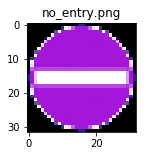

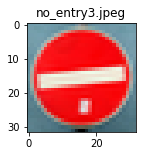

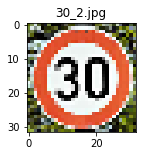

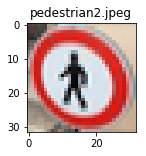

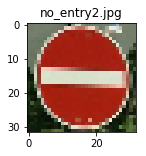

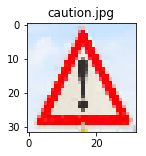

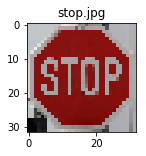

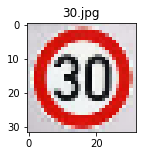

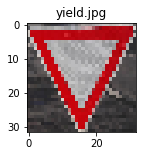

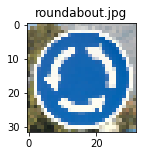

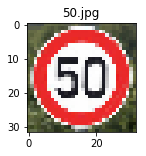

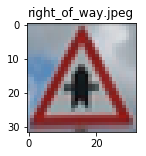

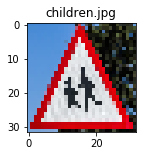

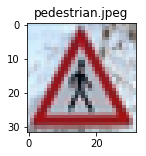

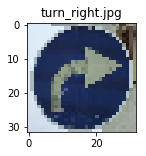

In [22]:
import os
from skimage.io import imread
from skimage.transform import resize
new_img_paths = os.listdir('data/new_images')

new_images = np.zeros((len(new_img_paths), 32, 32, n_channels), dtype=np.float32)
for idx, img_path in enumerate(new_img_paths):
    img = imread(os.path.join('data/new_images', img_path))
    img = resize(img, (32, 32, n_channels))
    new_images[idx] = img
    plt.figure(figsize=(2,2))
    plt.imshow(img)
    plt.title(img_path)
    plt.show()

### Predict the Sign Type for Each Image

INFO:tensorflow:Restoring parameters from models/model-1507749777.chkp
Predicted sign: No entry


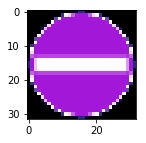

Predicted sign: No entry


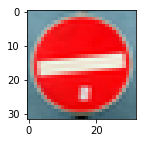

Predicted sign: Speed limit (30km/h)


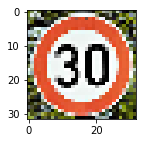

Predicted sign: General caution


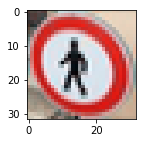

Predicted sign: No entry


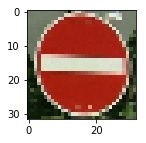

Predicted sign: General caution


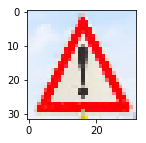

Predicted sign: Stop


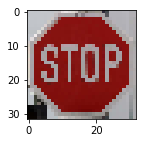

Predicted sign: Speed limit (30km/h)


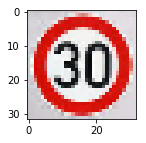

Predicted sign: Yield


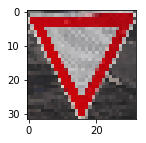

Predicted sign: Roundabout mandatory


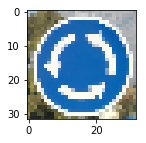

Predicted sign: Speed limit (50km/h)


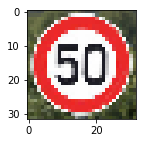

Predicted sign: Right-of-way at the next intersection


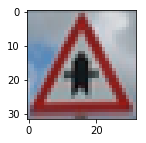

Predicted sign: Children crossing


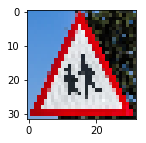

Predicted sign: Pedestrians


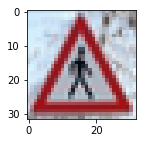

Predicted sign: Turn right ahead


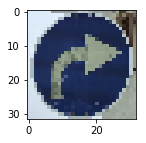

In [47]:
# Pre-processing
new_images_post = normalize(new_images)

sess = tf.Session()
sess.run(tf.global_variables_initializer())
sess.run(tf.local_variables_initializer())
saver.restore(sess, "models/model-1507749777.chkp")
predictions, top_5 = sess.run([y_pred, top_5_operation], feed_dict={x: new_images_post})
for idx, prediction in enumerate(predictions):
    signname = signnames_df[signnames_df.ClassId == prediction].SignName.values[0]
    print("Predicted sign: {}".format(signname))
    plt.figure(figsize=(2,2))
    plt.imshow(new_images[idx])
    plt.show()

### Analyze Performance

In [48]:
accuracy = 14/len(new_images)
print('Accuracy on web images: {:.3f}'.format(accuracy))

Accuracy on web images: 0.933


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

In [49]:
print("Top 5 probablities for images from web: ")
for i in range(len(top_5.values)):
    top_5_prob_i = top_5.values[i]
    print(new_img_paths[i], ":", ", ".join(map(lambda x: "{:.5f}".format(x), top_5_pred_i)))

Top 5 probablities for images from web: 
no_entry.png : 0.99832, 0.00096, 0.00034, 0.00026, 0.00007
no_entry3.jpeg : 0.99832, 0.00096, 0.00034, 0.00026, 0.00007
30_2.jpg : 0.99832, 0.00096, 0.00034, 0.00026, 0.00007
pedestrian2.jpeg : 0.99832, 0.00096, 0.00034, 0.00026, 0.00007
no_entry2.jpg : 0.99832, 0.00096, 0.00034, 0.00026, 0.00007
caution.jpg : 0.99832, 0.00096, 0.00034, 0.00026, 0.00007
stop.jpg : 0.99832, 0.00096, 0.00034, 0.00026, 0.00007
30.jpg : 0.99832, 0.00096, 0.00034, 0.00026, 0.00007
yield.jpg : 0.99832, 0.00096, 0.00034, 0.00026, 0.00007
roundabout.jpg : 0.99832, 0.00096, 0.00034, 0.00026, 0.00007
50.jpg : 0.99832, 0.00096, 0.00034, 0.00026, 0.00007
right_of_way.jpeg : 0.99832, 0.00096, 0.00034, 0.00026, 0.00007
children.jpg : 0.99832, 0.00096, 0.00034, 0.00026, 0.00007
pedestrian.jpeg : 0.99832, 0.00096, 0.00034, 0.00026, 0.00007
turn_right.jpg : 0.99832, 0.00096, 0.00034, 0.00026, 0.00007


Looks like the network is extremely confident in its predictions (p>0.99). However, it makes a mistake in classifying pedestrian2.jpg. It incorrectly classified that image as "General caution". Lets take a deeper look why thats the case.

In [50]:
# 50.jpg is index 10
tp_5 = sess.run([top_5_operation], feed_dict={x: new_images_post})
top_5_idxs = top_5.indices[3]

for cls in top_5_idxs:
    signname = signnames_df[signnames_df.ClassId == cls].SignName.values[0]
    print("Predicted sign: {}".format(signname))

Predicted sign: General caution
Predicted sign: Traffic signals
Predicted sign: Road narrows on the right
Predicted sign: Speed limit (30km/h)
Predicted sign: Pedestrians


I believe this is because the sign for general caution is very similar to the sign for pedestrians. A future improvement could involved performing data augmentation on just the pedestrians class. 

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


INFO:tensorflow:Restoring parameters from models/model-1507749777.chkp
(5, 5, 3, 48)


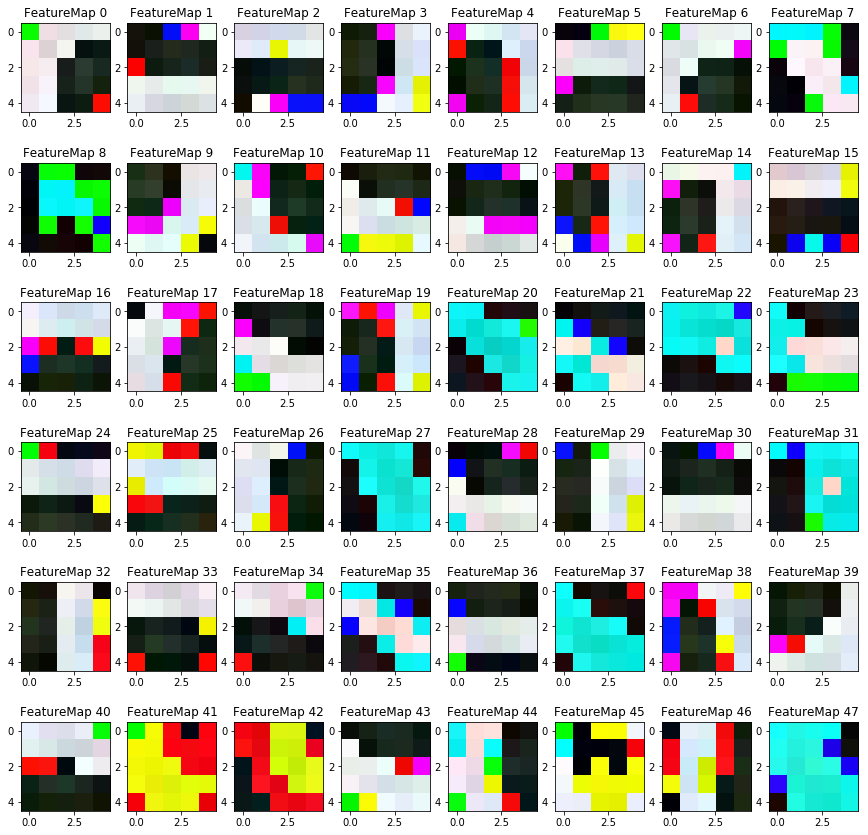

In [56]:
# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    #activation = tf_activation.eval(session=sess,feed_dict={x: image_input})
    #activation = sess.run(tf_activation, feed_dict={x: image_input})
    activation = sess.run(tf_activation, feed_dict={x: image_input})
    print(activation.shape)
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[:,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[:,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[:,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[:,:,:, featuremap], interpolation="nearest", cmap="gray")

sess = tf.Session()
sess.run(tf.global_variables_initializer())
sess.run(tf.local_variables_initializer())
saver.restore(sess, "models/model-1507749777.chkp")
outputFeatureMap(new_images_post, 'conv1_W:0', activation_min=0, activation_max=255, plt_num=1)